# Experiments

#### Imports:

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn import preprocessing

#### Constants:

In [2]:
CSV_PATH = "complete-frame.csv"

#### Aux functions:

In [9]:
def silent_evaluation(model, x_test, y_test):
    f = open('/dev/null', 'w')
    regular_stdout = sys.stdout
    sys.stdout = f
    test_loss, test_acc = model.evaluate(x_test, y_test)
    sys.stdout = regular_stdout
    print('Model Accuracy: {}'.format(test_acc))
    
    
def split_data(train_x, train_y, training=0.8, validation=0.5):
    train_size = training

    train_cnt = math.floor(train_x.shape[0] * train_size)
    x_train = train_x.iloc[0:train_cnt].values
    y_train = train_y.iloc[0:train_cnt].values
    x_test = train_x.iloc[train_cnt:]
    y_test = train_y.iloc[train_cnt:]

    division = validation

    train_cnt = math.floor(x_test.shape[0] * division)
    x_validate = x_test.iloc[0:train_cnt].values
    y_validate = y_test.iloc[0:train_cnt].values
    x_test = x_test.iloc[train_cnt:].values
    y_test = y_test.iloc[train_cnt:].values

    return x_train, y_train, x_test, y_test, x_validate, y_validate


def plot_graphs(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

#### Load data:

In [4]:
def load_meaningful_subset():
    frame = pd.read_csv(CSV_PATH, sep=",")
    columns = [frame.no_mutations,
                         #frame.line_coverage,
                         frame.csm_FE,
                         frame.CONNECTIVITY_prod,
                         frame.CONNECTIVITY_test,
                         frame.isEagerTest,
                         frame.LOC_prod, frame.LOC_test, frame.WMC_prod,
                         frame.LCOM1_prod, frame.LCOM2_prod,
                         frame.LCOM4_prod, frame.McCABE_prod,
                         frame.RFC_prod, frame.MPC_prod,
                         frame.RFC_test, frame.MPC_test,
                         frame.LCOM1_test, frame.LCOM2_test,
                         frame.LCOM4_test, frame.LCC_test,
                         frame.LCC_test, frame.WMC_test,
                         frame.McCABE_test, frame.NOP_prod,
                         frame.NOA_prod, frame.Random]
    
    data_x = pd.concat(columns, axis = 1).round(2)
    data_y = pd.concat([frame.mutation], axis = 1)
    return data_x, data_y, len(columns)

#### Data Manipulations:

In [5]:
def median(data_x, data_y):
    frame = pd.read_csv(CSV_PATH, sep=",")
    labels = [1,2]
    bins = [0,frame.mutation.median(),1]
    frame['mutation_bins'] = pd.cut(frame.mutation, bins=bins, labels = labels, include_lowest=True)
    data_y = pd.concat([frame.mutation_bins], axis = 1)
    return split_data(data_x, data_y)

## Experiment #1: Effective Vs. Non Effective
    - 2 classes: effective tests and non-effective tests:
        - Effective > median(mutation_score)
        - Non Effective < media(mutation_score)

Model Accuracy: 0.7603305578231812


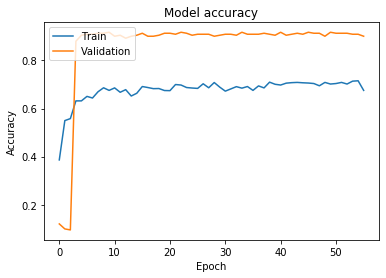

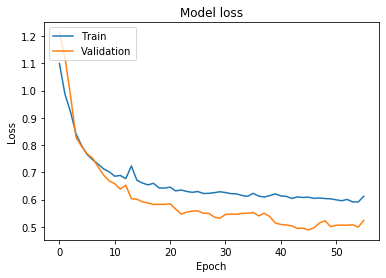

Max accuracy: 0.7768595
Overfit checks:
Model Accuracy: 0.704356849193573


In [10]:
data_x, data_y, number_of_features = load_meaningful_subset()
x_train, y_train, x_test, y_test, x_validate, y_validate = median(data_x, data_y)

model = keras.Sequential()
model.add(keras.layers.Dense(number_of_features, input_dim=number_of_features, activation=tf.nn.relu))
model.add(keras.layers.Dense(15, activation=tf.nn.softmax))
model.add(keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=1000, verbose=0,
          validation_data=(x_validate, y_validate), callbacks=[early_stopping_monitor])

silent_evaluation(model, x_test, y_test)

plot_graphs(history)
    
print('Max accuracy:', max_accuracy)

#Check Overfeet
print("Overfit checks:")
silent_evaluation(model, x_train, y_train)

In [7]:
#Check Overfeet
test_loss, test_acc = model.evaluate(x_train, y_train)

1928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Experiment #1: Results

- 0s 49us/sample - loss: 1.3501 - accuracy: 0.7975
Test accuracy: 0.79752064


--------------------
75.6%
83.3%

## Experiment #2: Predicting Mutation Score
    - 11 categories of mutation score: from 0, 0.1, 0.2, .... 1
    - The goal: predict the mutation score

In [8]:
data_y = pd.concat([frame.mutation], axis = 1).round(1).mul(10)

x_train, y_train, x_test, y_test, x_validate, y_validate = split_data(data_x, data_y)

# Define the model architecture

model = keras.Sequential()
model.add(keras.layers.Dense(22, input_dim=22, activation=tf.nn.relu))
model.add(keras.layers.Dense(18, activation=tf.nn.relu))
model.add(keras.layers.Dense(12, activation=tf.nn.relu))
model.add(keras.layers.Dense(6, activation=tf.nn.relu))
model.add(keras.layers.Dense(11, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)


model.fit(x_train, y_train, epochs=1000, verbose=1,
          validation_data=(x_validate, y_validate),
          callbacks=[early_stopping_monitor])

# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

NameError: name 'frame' is not defined

### Best Result: 
0s 56us/sample - loss: 2.1090 - accuracy: 0.2397 Test accuracy: **0.23966943**

(Not an over fit: accuracy on trainin data is 0.182)

In [ ]:
#Check Overfeet
test_loss, test_acc = model.evaluate(x_train, y_train)

## Experiment #3: All data
    - 2 categories
    - The goal: predict the mutation score

In [ ]:
data_x = pd.concat([frame.no_mutations, frame.line_coverage, frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability], axis=1).round(2)


#Edit the y axis data according to the description:
labels = [1,2]
bins = [0,frame.mutation.median(),1]
frame['mutation_bins'] = pd.cut(frame.mutation, bins=bins, labels = labels, include_lowest=True)
data_y = pd.concat([frame.mutation_bins], axis = 1)

x_train, y_train, x_test, y_test, x_validate, y_validate = split_data(data_x, data_y)

# Define the model architecture

model = keras.Sequential()
model.add(keras.layers.Dense(68, input_dim=68, activation=tf.nn.relu))
#model.add(keras.layers.Dense(50, activation=tf.nn.relu))
#model.add(keras.layers.Dense(40, activation=tf.nn.relu))
model.add(keras.layers.Dense(20, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.relu))
model.add(keras.layers.Dense(6, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

max_accuracy = 0
for i in range(0,1):
    model.fit(x_train, y_train, epochs=1000, verbose=1,
          validation_data=(x_validate, y_validate))#,
          #callbacks=[early_stopping_monitor])
    # Evaluate the model using test dataset.
    test_loss, test_acc = model.evaluate(x_test, y_test)
    if test_acc > max_accuracy:
        max_accuracy = test_acc
    
print('Max accuracy:', max_accuracy)

#Check Overfeet
#test_loss, test_acc = model.evaluate(x_train, y_train)





## Misc.

In [ ]:
"""
train_x = pd.concat([frame.no_mutations, frame.line_coverage, frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability], axis=1).round(2)
"""

    #Preprocess the data
    #min_max_scaler = preprocessing.MinMaxScaler()
    #x_validate = min_max_scaler.fit_transform(x_validate)
    #x_train = min_max_scaler.fit_transform(x_train)
    #x_test = min_max_scaler.fit_transform(x_test)